# Assignment 4 (Week 4)

>**Note**: Late submissions are ***`penalized`***.

## Name: Enter Your Name
 DEBORAH AJAKAIYE
<br>

### Please show and display all your calculations and results.

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Built-in library
import itertools
import re
import json
import typing as tp

# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000

# Black code formatter (Optional)


In [2]:
!pip install nb_black
%load_ext nb_black

<IPython.core.display.Javascript object>

### nb_black Installation And Usage

```bash
# On your command line, run:
pip install nb_black 
```


```python
# For jupyter notebook
%load_ext nb_black

# For jupyter lab
%load_ext lab_black
```


In [3]:
art = pd.read_csv("art.csv")
art

,Name,Genuine,Category,Buy,Sell,Color 1,Color 2,Size,Real Artwork Title,Artist,Museum Description,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Speaker Type,Lighting Type,Catalog,Filename,Internal ID,Unique Entry ID
0,academic painting,Yes,Wall-mounted,4980,1245,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianMan,12619,xfTf9sfyLkxHQEz4u
1,academic painting,No,Wall-mounted,4980,0,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianManFake,12620,5KNFAo3LkdTTJPQkd
2,amazing painting,Yes,Wall-mounted,4980,1245,None,None,2x2,The Night Watch,"Rembrandt van Rijn, 1642, Oil on canvas","This masterpiece, painted by 17th century Dutch artist Rembrandt, depicts a military gathering. At the time, portraits usually showed their subjects standing still. So this was a leap forward in technique. For many years, art scholars thought the painting was set at night, but a restoration revealed a dark varnish. We can now see the dynamic poses and lighting as they were meant to be seen—in the daytime!",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtNightWatch,56,Sg6MCSG3m9tvjGWoj
3,amazing painting,No,Wall-mounted,4980,0,None,None,2x2,The Night Watch,"Rembrandt van Rijn, 1642, Oil on canvas","This masterpiece, painted by 17th century Dutch artist Rembrandt, depicts a military gathering. At the time, portraits usually showed their subjects standing still. So this was a leap forward in technique. For many years, art scholars thought the painting was set at night, but a restoration revealed a dark varnish. We can now see the dynamic poses and lighting as they were meant to be seen—in the daytime!",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtNightWatchFake,55,vc2Ebu4Pkn443zYiN
4,ancient statue,Yes,Miscellaneous,4980,1245,None,None,1x1,"Jōmon Period ""Dogū"" Figurine Shakōki-dogū","Artist Unknown, 1000-400 BCE, Fired pottery","A mysterious, riveting doll made from kneaded, unglazed dirt during the Jōmon period. Its large round eyes resemble goggles that intercept light, so its name should come as no surprise. ""Shakōki"" means ""light-intercepting goggles,"" and a dogū is a small animal figurine.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,folk art,None,None,No,Sculpture,Does not play music,No lighting,Not for sale,FtrSculptureDoguu,1337,zpAsguge9Yb29ksjS
5,ancient statue,No,Miscellaneous,4980,0,None,None,1x1,"Jōmon Period ""Dogū"" Figurine Shakōki-dogū","Artist Unknown, 1000-400 BCE, Fired pottery","A mysterious, riveting doll made from kneaded, unglazed dirt during the Jōmon period. Its large round eyes resemble goggles that intercept light, so its name should come as no surprise. ""Shakōki"" means ""light-intercepting goggles,"" and a dogū is a small animal figurine.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Sculpture,Does not play music,No lighting,Not for sale,FtrSculptureDoguuFake,1338,fXbsrcXirg6miBoqT
6,basic painting,Yes,Wall-mounted,4980,1245,None,None,1x2,The Blue Boy,"Thomas Gainsborough, 1770, Oil on canvas","Gainsborough was known for his innovative use of colors in his traditional portraits, like this one. Alt

<IPython.core.display.Javascript object>

In [4]:
art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                70 non-null     object 
 1   Genuine             70 non-null     object 
 2   Category            70 non-null     object 
 3   Buy                 70 non-null     int64  
 4   Sell                70 non-null     int64  
 5   Color 1             70 non-null     object 
 6   Color 2             70 non-null     object 
 7   Size                70 non-null     object 
 8   Real Artwork Title  70 non-null     object 
 9   Artist              70 non-null     object 
 10  Museum Description  70 non-null     object 
 11  Source              70 non-null     object 
 12  Source Notes        0 non-null      float64
 13  Version             70 non-null     object 
 14  HHA Concept 1       70 non-null     object 
 15  HHA Concept 2       70 non-null     object 
 16  HHA Series

<IPython.core.display.Javascript object>

### Qs1

#### The data can be found [here](https://drive.google.com/file/d/1WFMBMR4e5o2B1rzDbOWaTorZRuKU3UOD/view?usp=share_link)

a.) Create a new column called **`Name`** from the **`Artist`** column. Return the name of the artist. \
e.g. \
`Tawaraya SÅtatsu, 17th century, Gold leaf and ink on paper`: `Tawaraya SÅ tatsu` \
`Artist Unknown, circa 190 BCE, Marble `: `Artist Unknown`


b.) Create a new column called **`Date`** from the `Artist` column which extracts the date/period
from the `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `1974` \
`Artist Unknown, 196 BCE, Granodiorite`: `196 BCE`

c.) Finally, Create a new column called **`Art_type`** by extracting values from `Artist` column. \
e.g. \
`TÅshÅ«sai Sharaku, 1794, Woodblock print`: `Woodblock print` \
`Artist Unknown, 196 BCE, Granodiorite`: `Granodiorite`

* To validate your results, find the **`unique values`** in **`each column`** you created.

In [5]:
str

str

<IPython.core.display.Javascript object>

In [61]:
art["Name"] = (
    art["Artist"].str.extract(r"(\w*\s*[a-zA-Z]\s*\w*\s*\w*)")
)
art


,Name,Genuine,Category,Buy,Sell,Color 1,Color 2,Size,Real Artwork Title,Artist,Museum Description,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Speaker Type,Lighting Type,Catalog,Filename,Internal ID,Unique Entry ID,Date
0,Leonardo da Vinci,Yes,Wall-mounted,4980,1245,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianMan,12619,xfTf9sfyLkxHQEz4u,circa 1487
1,Leonardo da Vinci,No,Wall-mounted,4980,0,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianManFake,12620,5KNFAo3LkdTTJPQkd,circa 1487
2,Rembrandt van Rijn,Yes,Wall-mounted,4980,1245,None,None,2x2,The Night Watch,"Rembrandt van Rijn, 1642, Oil on canvas","This masterpiece, painted by 17th century Dutch artist Rembrandt, depicts a military gathering. At the time, portraits usually showed their subjects standing still. So this was a leap forward in technique. For many years, art scholars thought the painting was set at night, but a restoration revealed a dark varnish. We can now see the dynamic poses and lighting as they were meant to be seen—in the daytime!",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtNightWatch,56,Sg6MCSG3m9tvjGWoj,1642
3,Rembrandt van Rijn,No,Wall-mounted,4980,0,None,None,2x2,The Night Watch,"Rembrandt van Rijn, 1642, Oil on canvas","This masterpiece, painted by 17th century Dutch artist Rembrandt, depicts a military gathering. At the time, portraits usually showed their subjects standing still. So this was a leap forward in technique. For many years, art scholars thought the painting was set at night, but a restoration revealed a dark varnish. We can now see the dynamic poses and lighting as they were meant to be seen—in the daytime!",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtNightWatchFake,55,vc2Ebu4Pkn443zYiN,1642
4,Artist Unknown,Yes,Miscellaneous,4980,1245,None,None,1x1,"Jōmon Period ""Dogū"" Figurine Shakōki-dogū","Artist Unknown, 1000-400 BCE, Fired pottery","A mysterious, riveting doll made from kneaded, unglazed dirt during the Jōmon period. Its large round eyes resemble goggles that intercept light, so its name should come as no surprise. ""Shakōki"" means ""light-intercepting goggles,"" and a dogū is a small animal figurine.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,folk art,None,None,No,Sculpture,Does not play music,No lighting,Not for sale,FtrSculptureDoguu,1337,zpAsguge9Yb29ksjS,1000-400 BCE
5,Artist Unknown,No,Miscellaneous,4980,0,None,None,1x1,"Jōmon Period ""Dogū"" Figurine Shakōki-dogū","Artist Unknown, 1000-400 BCE, Fired pottery","A mysterious, riveting doll made from kneaded, unglazed dirt during the Jōmon period. Its large round eyes resemble goggles that intercept light, so its name should come as no surprise. ""Shakōki"" means ""light-intercepting goggles,"" and a dogū is a small animal figurine.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Sculpture,Does not play music,No lighting,Not for sale,FtrSculptureDoguuFake,1338,fXbsrcXirg6miBoqT,1000-400 BCE
6,Thomas Gainsborough,Yes,Wall-mounted,4980,1245,None,None,1x2,The Blue Boy,"Thomas Gainsborough, 1770, Oil on canvas","Gainsborough was known for his i

<IPython.core.display.Javascript object>

In [7]:
art["Date"] = art["Artist"].astype(str).apply(lambda date: date.split(",")[1])
art

,Name,Genuine,Category,Buy,Sell,Color 1,Color 2,Size,Real Artwork Title,Artist,Museum Description,Source,Source Notes,Version,HHA Concept 1,HHA Concept 2,HHA Series,HHA Set,Interact,Tag,Speaker Type,Lighting Type,Catalog,Filename,Internal ID,Unique Entry ID,Date
0,Leonardo da Vinci,Yes,Wall-mounted,4980,1245,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianMan,12619,xfTf9sfyLkxHQEz4u,circa 1487
1,NaN,No,Wall-mounted,4980,0,None,None,1x1,Vitruvian Man,"Leonardo da Vinci, circa 1487, Pen and ink on paper","This drawing is based on the ""ideal"" human-body ratio, as stated in ""De architectura."" ""De architectura"" was a treatise by Vitruvius, an architect from the early 1st century BCE.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtVitruvianManFake,12620,5KNFAo3LkdTTJPQkd,circa 1487
2,Rembrandt van Rijn,Yes,Wall-mounted,4980,1245,None,None,2x2,The Night Watch,"Rembrandt van Rijn, 1642, Oil on canvas","This masterpiece, painted by 17th century Dutch artist Rembrandt, depicts a military gathering. At the time, portraits usually showed their subjects standing still. So this was a leap forward in technique. For many years, art scholars thought the painting was set at night, but a restoration revealed a dark varnish. We can now see the dynamic poses and lighting as they were meant to be seen—in the daytime!",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,facility,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtNightWatch,56,Sg6MCSG3m9tvjGWoj,1642
3,NaN,No,Wall-mounted,4980,0,None,None,2x2,The Night Watch,"Rembrandt van Rijn, 1642, Oil on canvas","This masterpiece, painted by 17th century Dutch artist Rembrandt, depicts a military gathering. At the time, portraits usually showed their subjects standing still. So this was a leap forward in technique. For many years, art scholars thought the painting was set at night, but a restoration revealed a dark varnish. We can now see the dynamic poses and lighting as they were meant to be seen—in the daytime!",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Picture,Does not play music,No lighting,Not for sale,FtrArtNightWatchFake,55,vc2Ebu4Pkn443zYiN,1642
4,Artist Unknown,Yes,Miscellaneous,4980,1245,None,None,1x1,"Jōmon Period ""Dogū"" Figurine Shakōki-dogū","Artist Unknown, 1000-400 BCE, Fired pottery","A mysterious, riveting doll made from kneaded, unglazed dirt during the Jōmon period. Its large round eyes resemble goggles that intercept light, so its name should come as no surprise. ""Shakōki"" means ""light-intercepting goggles,"" and a dogū is a small animal figurine.",Jolly Redd's Treasure Trawler,NaN,1.2.0,expensive,folk art,None,None,No,Sculpture,Does not play music,No lighting,Not for sale,FtrSculptureDoguu,1337,zpAsguge9Yb29ksjS,1000-400 BCE
5,NaN,No,Miscellaneous,4980,0,None,None,1x1,"Jōmon Period ""Dogū"" Figurine Shakōki-dogū","Artist Unknown, 1000-400 BCE, Fired pottery","A mysterious, riveting doll made from kneaded, unglazed dirt during the Jōmon period. Its large round eyes resemble goggles that intercept light, so its name should come as no surprise. ""Shakōki"" means ""light-intercepting goggles,"" and a dogū is a small animal figurine.",Jolly Redd's Treasure Trawler,NaN,1.2.0,horror,None,None,None,No,Sculpture,Does not play music,No lighting,Not for sale,FtrSculptureDoguuFake,1338,fXbsrcXirg6miBoqT,1000-400 BCE
6,Thomas Gainsborough,Yes,Wall-mounted,4980,1245,None,None,1x2,The Blue Boy,"Thomas Gainsborough, 1770, Oil on canvas","Gainsborough was known for his innovative use of colors in his tradition

<IPython.core.display.Javascript object>

In [8]:
art["Artist"].str.split(",")[69][-1]

' Oil on canvas'

<IPython.core.display.Javascript object>

In [9]:
# 1c Enter your solution here

<IPython.core.display.Javascript object>

### Qs 2:

#### The data can be found [here](https://drive.google.com/file/d/1xSfSnIWZEWo9WHIXSRfOKRGcCyZ-iNtk/view?usp=share_link)

a.) Write a `Python class`, **`NumericTransformers`**, that can be used to apply the following transformations to columns: `no_of_adults`, `arrival_month` and `no_of_special_requests`

    i.) Sigmoid transformation
    
$$\sigma(x) = \frac {1}{1+e^{-x}}$$
    
    ii.) Cube root transformation
    
$$x_{transformed} = \sqrt[3]{x}$$
    
    
```python
class NumericTransformers:
    """This class is used to apply 'Sigmoid' and 'Cube root'
    transformations to the input data (Vector)."""
    pass
```

Create a `new dataframe` and find the **`descriptive summary statistics`** of the newly transformed features for **each transformation**. \
Hint: Use `.describe()`

b.) Find the **correlation** between the numeric data . Visualize your result using **Seaborn's heatmap**.


In [10]:
Hotel = pd.read_csv("Hotel Reservations.csv")
Hotel

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


<IPython.core.display.Javascript object>

In [11]:
from scipy.special import expit

<IPython.core.display.Javascript object>

In [12]:
class NumericTransformers:
    """to apply sigmoid and cuberoot transformation"""
    def __init__(self, *, X_vector: np.ndarray) -> None:
        self.X_vector = X_vector.copy()
        self.X_exp = np.exp(X_vector)
        self.cbrt = np.cbrt(X_vector)
        
    
    def __repr__(self) -> str:
        """This returns the string representation."""
        return (
            f"{self.__class__.__name__}(exp={round(self.X_exp, 3)}"
        )
    
    def show_array_properties(self) -> None:
        """This returns the shape, number of
        dimensions and the size of the input array.
        """
        arr = self.X_vector

        print(f"\nShape: {arr.shape}" f"\nNDim: {arr.ndim}" f"\nSize: {arr.size}")
        
    def sigmoid(self) -> np.ndarray:
        """This returns sigmoid transformation

        X_sigmoid = 1 / (1 + np.exp(-X))
        """
        X_sig = 1 / (1 + np.exp(-X))
        return X_sig
    
    def cuberoot(self) -> np.ndarray:
        """This returns cuberoot transformation

        X_cbrt = (X** (1 /3))
        """
        X_cbrt = (X** (1 /3))
        return X_cbrt
        
        pass


<IPython.core.display.Javascript object>

In [13]:
X = Hotel[["no_of_adults", "arrival_month", "no_of_special_requests"]]
X

,no_of_adults,arrival_month,no_of_special_requests
0,2,10,0
1,2,11,1
2,1,2,0
3,2,5,0
4,2,4,0
...,...,...,...
36270,3,8,1
36271,2,10,2
36272,2,7,2
36273,2,4,0


<IPython.core.display.Javascript object>

In [14]:
nt = NumericTransformers(X_vector=X)
nt

NumericTransformers(exp=       no_of_adults  arrival_month  no_of_special_requests
0             7.389      22026.466                   1.000
1             7.389      59874.142                   2.718
2             2.718          7.389                   1.000
3             7.389        148.413                   1.000
4             7.389         54.598                   1.000
...             ...            ...                     ...
36270        20.086       2980.958                   2.718
36271         7.389      22026.466                   7.389
36272         7.389       1096.633                   7.389
36273         7.389         54.598                   1.000
36274         7.389     162754.791                   1.000

[36275 rows x 3 columns]

<IPython.core.display.Javascript object>

In [15]:
nt.show_array_properties()


Shape: (36275, 3)
NDim: 2
Size: 108825


<IPython.core.display.Javascript object>

In [16]:
new1 = nt.sigmoid()
new1


,no_of_adults,arrival_month,no_of_special_requests
0,0.880797,0.999955,0.500000
1,0.880797,0.999983,0.731059
2,0.731059,0.880797,0.500000
3,0.880797,0.993307,0.500000
4,0.880797,0.982014,0.500000
...,...,...,...
36270,0.952574,0.999665,0.731059
36271,0.880797,0.999955,0.880797
36272,0.880797,0.999089,0.880797
36273,0.880797,0.982014,0.500000


<IPython.core.display.Javascript object>

In [17]:
new2 = nt.cuberoot()
new2

,no_of_adults,arrival_month,no_of_special_requests
0,1.259921,2.154435,0.000000
1,1.259921,2.223980,1.000000
2,1.000000,1.259921,0.000000
3,1.259921,1.709976,0.000000
4,1.259921,1.587401,0.000000
...,...,...,...
36270,1.442250,2.000000,1.000000
36271,1.259921,2.154435,1.259921
36272,1.259921,1.912931,1.259921
36273,1.259921,1.587401,0.000000


<IPython.core.display.Javascript object>

In [18]:
new1.describe()

,no_of_adults,arrival_month,no_of_special_requests
count,36275.000000,36275.000000,36275.000000
mean,0.852203,0.981613,0.627820
std,0.069484,0.050257,0.149031
min,0.500000,0.731059,0.500000
25%,0.880797,0.993307,0.500000
50%,0.880797,0.999665,0.500000
75%,0.880797,0.999955,0.731059
max,0.982014,0.999994,0.993307


<IPython.core.display.Javascript object>

In [19]:
import seaborn as sns

<IPython.core.display.Javascript object>

<AxesSubplot:>

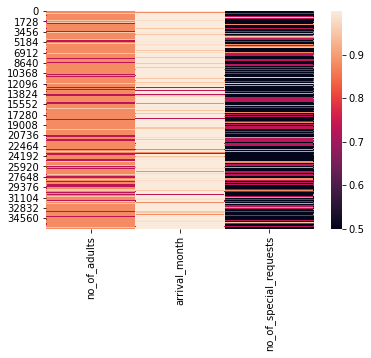

<IPython.core.display.Javascript object>

In [20]:
sns.heatmap(new1)

<AxesSubplot:>

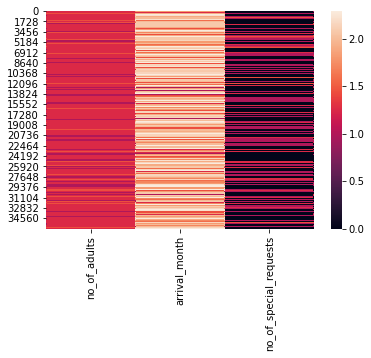

<IPython.core.display.Javascript object>

In [21]:
sns.heatmap(new2)

### Qs 3:

Given the string shown below

```python
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz .stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)
```
a.) Write a RegEx pattern that displays all the valid:

    i.) URLs

    ii.) phone numbers (11 or more digits)

b.) Given the array shown below:

```python
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))
```

i.) write a code that **normalizes** the array, `A` using:

$$
x_{new} = \frac{x_{i} - x_{min}}{x_{max} - x_{min}}
$$

* Return the **descriptive statistics** of the normalized array.

ii.) Create **histogram** of the normalized array, `A`

In [22]:
my_string = (
    "You can call me on this number:(+234) 287 576 3098 or 0808 576 8013. The first number is my personal number. "
    "Kyle Stevens, one of the company’s researchers, called on companies to buy fake URLs so that they can’t "
    "be used by scammers for example:'www.barclays-supports.com'."
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "This is not even a valid url www.xyz.stutern.com. I tried calling this number:0803 5771 42 but it's invalid! "
    "Some random number +1-814-300-8859 which I found on this website:"
    "https://zadarma.com/en/tariffs/numbers/united-states/mobile/ "
    "https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link "
)

<IPython.core.display.Javascript object>

In [23]:
pattern = r"(http.?\W{3}.?\w*\W*\w*\W*\w*\W*\w*)"
result = re.findall(pattern=pattern, string=my_string, flags=re.I)
result

['https://zadarma.com/en/tariffs',
 'https://zadarma.com/en/tariffs',
 'https://drive.google.com/file']

<IPython.core.display.Javascript object>

In [24]:
pattern = r"(\*?\d{3,4}\s*\-*\s*\d{3,4}\s*\-*\s*\d*)"
result = re.compile(pattern=pattern, flags=re.I).findall(string=my_string)
result

['287 576 3098', '0808 576 8013', '0803 5771 42', '814-300-8859']

<IPython.core.display.Javascript object>

In [25]:
rng = np.random.default_rng(seed=15)
A = rng.random(size=(10, 5))

<IPython.core.display.Javascript object>

In [34]:
class Scaler:
    """This is used to Standardize or Normalize the data."""

    def __init__(self, *, A_vector: np.ndarray) -> None:
        self.A_vector = A_vector.copy()
        self.A_min = np.min(A_vector)
        self.A_max = np.max(A_vector)

    def __repr__(self) -> str:
        """This returns the string representation."""
        return f"min={self.A_min}, " f"max={self.A_max})"

    def show_array_properties(self) -> None:
        """This returns the shape, number of
        dimensions and the size of the input array.
        """
        arr = self.A_vector

        print(f"\nShape: {arr.shape}" f"\nNDim: {arr.ndim}" f"\nSize: {arr.size}")

    def normalize(self) -> np.ndarray:
        """This returns the normalized form of the vector.
        i.e the values range between 0 and 1.

        A_normalized = (A - A_min) / (A_max - A_min)
        """
        A_new = (self.A_vector - self.A_min) / (self.A_max - self.A_min)
        return A_new

<IPython.core.display.Javascript object>

In [39]:
scaler = Scaler(A_vector=A)
A_hour = scaler.normalize()
A_hour

array([[0.70407564, 0.83256166, 0.34042063, 0.02767826, 0.57760202],
       [0.13354498, 0.73124825, 0.34141214, 0.45797536, 0.99972388],
       [0.79669995, 0.86176472, 0.5603943 , 0.96389826, 0.        ],
       [0.90915482, 0.38776673, 0.22279939, 0.53876296, 0.96710213],
       [0.32642253, 0.92944687, 0.46875121, 0.99069336, 0.77870281],
       [0.79867079, 0.35829425, 0.59450476, 0.24034761, 0.81619372],
       [0.25076383, 0.68305658, 0.0595271 , 0.23859439, 0.35473738],
       [0.16049004, 0.25261035, 0.19154601, 0.02238063, 0.33881524],
       [0.46970965, 0.41657102, 0.91994953, 0.07365098, 0.63227372],
       [0.34494106, 0.007978  , 0.78786006, 0.42144097, 1.        ]])

<IPython.core.display.Javascript object>

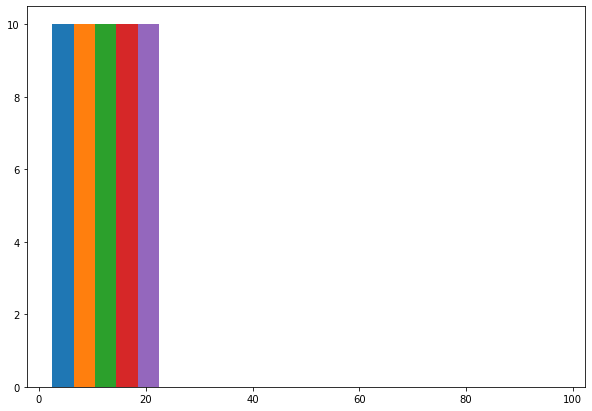

<IPython.core.display.Javascript object>

In [42]:
from matplotlib import pyplot

fig, A_hourx = plt.subplots(figsize=(10, 7))
A_hourx.hist(A_hour, bins=[0, 25, 50, 75, 100])
plt.show()

### Qs 4

#### The data can be found [here](https://drive.google.com/file/d/1oP5Xz-Nrze3cK5p56XS2UcxQN1B-kZs9/view?usp=share_link)

a.) Clean the following columns: `price`, `SSD(GB)`, `warranty(years)`, `Display(inch)` \
Note: Return numerical values for the cleaned columns with the corresponding unit as the appended to the column name. \
e.g. \
SSD(GB) retuns: \
`512 GB HDD|512 GB SSD`: `512` \
The Display(inch) retuns: \
`38.1 cm (15 inch) Display`: `15`

* You might need to create **new columns** with the corresponding **column names**.
* **To validate your result, run**:

```python
df[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(n=10, random_state=10)
```

b.) 

i.) Create a new column called `RAM_type` which extract the type of RAM. \
e.g. \
`32 GB LPDDR5 RAM`: `LPDDR5`

ii.) Create a new column called `is_SSD` which which checks whether the `RAM` is SSD or not. It returns `True` if it's an `SSD` otherwise, `False`

c.) Using the approriate column, create an new column called `Brand_name` by extracting the brand names. Validate your result by displaying the unique values in `Brand_name`

In [45]:
laptops = pd.read_csv("laptops.csv").head()
laptops

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Keyboard,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty


<IPython.core.display.Javascript object>

In [52]:
laptops_clean = laptops.copy()

features = ["price", "SSD", "warranty", "Display"]

# Clean the columns
pattern = r"(\d{1,10}\.?\d*)"

for feat in features:
    laptops_clean[feat] = (
        laptops[feat].str.replace(",", "").str.extract(pattern).astype(float)
    )

<IPython.core.display.Javascript object>

In [58]:
laptops["SSD(GB)"] = laptops_clean["SSD"]
laptops["warranty(years)"] = laptops_clean["warranty"]
laptops["Display(inch)"] = laptops_clean["Display"]
laptops

,Unnamed: 0,title,price,discount,Processor,RAM,OS,SSD,Display,In_build_sw,warranty,SSD(GB),warranty(years),Display(inch)
0,0,DELL Vostro Core i3 11th Gen - (8 GB/1 TB HDD/256 GB SSD/Windows 11 Home) Vostro 3510 Thin and Light L...,"₹37,990","₹58,48935% off",Processor: Intel i3-1115G4 (Base- 1.7 GHz & Turbo up to 4.10 GHz) 2 Cores,RAM & Storage: 8GB DDR4 & 1TB HDD + 256GB SSD,Graphics & Keyboard: Integrated & Standard Keyboard,"Display: 15.6"" FHD WVA AG Narrow Border",Intel Core i3 Processor (11th Gen),NaN,8 GB DDR4 RAM,15.6,8.0,3.00
1,1,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB SSD/Windows 11 Home) 14s - dy2507TU Thin and Light Laptop,"₹35,490","₹47,20624% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,35.56 cm (14 inch) Display,NaN,1 Year Onsite Warranty,256.0,1.0,35.56
2,2,Lenovo V15 G2 Core i3 11th Gen - (8 GB/512 GB SSD/Windows 11 Home) V15 ITL G2 Laptop,"₹33,999","₹59,76043% off",Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,No,1 Year Onsite Warranty + 1 Year Accidental Damage Protection Add On,512.0,1.0,39.62
3,3,HP 15s Intel Core i3 12th Gen - (8 GB/512 GB SSD/Windows 11 Home) 15s-fq5007TU Thin and Light Laptop,"₹45,490","₹56,26019% off",Intel Core i3 Processor (12th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 Inch) Display,Microsoft Office Home & Student 2021,1 Year Onsite Warranty,512.0,1.0,39.62
4,4,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 GB/512 GB SSD/Windows 11 Home) X515JA-EJ362WS | X515JA-E...,"₹33,990","₹45,99026% off",Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39.62 cm (15.6 inch) Display,Office Home and Student 2021,1 Year Onsite Warranty,512.0,1.0,39.62


<IPython.core.display.Javascript object>

In [60]:
laptops[["price", "SSD(GB)", "warranty(years)", "Display(inch)"]].sample(
    n=10, random_state=10, replace=True
)

,price,SSD(GB),warranty(years),Display(inch)
1,"₹35,490",256.0,1.0,35.56
4,"₹33,990",512.0,1.0,39.62
0,"₹37,990",15.6,8.0,3.00
1,"₹35,490",256.0,1.0,35.56
3,"₹45,490",512.0,1.0,39.62
4,"₹33,990",512.0,1.0,39.62
1,"₹35,490",256.0,1.0,35.56
0,"₹37,990",15.6,8.0,3.00
1,"₹35,490",256.0,1.0,35.56
2,"₹33,999",512.0,1.0,39.62


<IPython.core.display.Javascript object>

In [74]:
laptops["Brand_name"] = laptops["title"].str.extract(r"(\w*\s*[a-zA-Z]\s)")

laptops["Brand_name"]


0      DELL 
1        HP 
2    Lenovo 
3        HP 
4      ASUS 
Name: Brand_name, dtype: object

<IPython.core.display.Javascript object>

In [75]:
laptops["Brand_name"].unique()

array(['DELL ', 'HP ', 'Lenovo ', 'ASUS '], dtype=object)

<IPython.core.display.Javascript object>